In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
import tmap as tm

### 1. Load Fragments RO3 dataset

In [2]:
# LANaPDB RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LANaPDB_RO3_Moleculardescriptors.csv"
lanapdb = pd.read_csv(url_data)
lanapdb = lanapdb[["ID", "SMILES_chiral"]]
lanapdb["Database"] = "LANaPDB"
lanapdb.tail(2)

,ID,SMILES_chiral,Database
1830,LANaPDB_fragments_73605,CC1(C)[C@H]2CCC[C@]3(CO3)[C@]2(C)C[C@H](O)[C@]...,LANaPDB
1831,LANaPDB_fragments_74033,CCC(C)=CC(=O)O,LANaPDB


In [3]:
# COCONUT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/COCONUT_RO3_Moleculardescriptors.csv"
coconut = pd.read_csv(url_data)
coconut = coconut[["ID", "SMILES_chiral","Database"]]
coconut.tail(2)

,ID,SMILES_chiral,Database
38745,COCONUT_fragments_2583030,O=c1cco[nH]1,COCONUT
38746,COCONUT_fragments_2583083,O=CC1C=CCC1,COCONUT


In [4]:
# Enamine RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Enamine_RO3_Moleculardescriptors.csv"
Enamine = pd.read_csv(url_data)
Enamine = Enamine[["ID", "SMILES_chiral"]]
Enamine["Database"] = "Enamine"
Enamine.tail(2)

,ID,SMILES_chiral,Database
8384,Z212848872,CC1CN(C(=O)Cc2cccc(F)c2)CCO1,Enamine
8385,Z228588126,CC(C(=O)N1CCCCCC1)N1CCNCC1,Enamine


In [5]:
# ChemDiv RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/ChemDiv_RO3_Moleculardescriptors.csv"
ChemDiv = pd.read_csv(url_data)
ChemDiv = ChemDiv[["ID", "SMILES_chiral","Database"]]
ChemDiv.tail(2)

,ID,SMILES_chiral,Database
16721,BB01-0446,CC(C)N1CCC2(CC1)NC(=O)c1ccccc1O2,ChemDiv
16722,BB01-0451,CC(=O)N1C(C(=O)O)CSC1c1ccc(C)cc1,ChemDiv


In [6]:
# Maybridge RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Maybridge_RO3_Moleculardescriptors.csv"
Maybridge = pd.read_csv(url_data)
Maybridge = Maybridge[["ID", "SMILES_chiral", "Database"]]
Maybridge.tail(2)

,ID,SMILES_chiral,Database
5910,KM08807,O=C1CC2CCCC(C1)N2Cc1ccccc1,Maybridge
5911,SEW04324,O=C(c1ccccc1)C1CCN(C(=O)C(F)(F)F)CC1,Maybridge


In [7]:
# Life Chemicals RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LifeChemicals_RO3_Moleculardescriptors.csv"
LifeChemicals = pd.read_csv(url_data)
LifeChemicals = LifeChemicals[["ID", "SMILES_chiral"]]
LifeChemicals["Database"] = "Life Chemicals"
LifeChemicals.tail(2)

,ID,SMILES_chiral,Database
14732,F6782-0679,Cn1cc(C(=O)c2ccccc2)c(=O)c2cc(F)ccc21,Life Chemicals
14733,F0788-0005,c1cc[n+]2cc3n(c2c1)Cc1c[n+]2ccccc2n1C3,Life Chemicals


In [8]:
# CRAFT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/CRAFT_RO3_Moleculardescriptors.csv"
CRAFT = pd.read_csv(url_data)
CRAFT = CRAFT[["ID", "SMILES_chiral", "Database"]]
CRAFT.tail(2)

,ID,SMILES_chiral,Database
174,QHM-0000005,O=C1C=C(Cl)C(=O)c2ccccc21,CRAFT
175,QHM-0000002,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,CRAFT


In [9]:
DATA = pd.concat([lanapdb,coconut, CRAFT, LifeChemicals, Enamine, Maybridge, ChemDiv])
DATA.head(2)

,ID,SMILES_chiral,Database
0,LANaPDB_fragments_1,CC=O,LANaPDB
1,LANaPDB_fragments_2,O,LANaPDB


In [10]:
set(list(DATA["Database"]))

{'COCONUT',
 'CRAFT',
 'ChemDiv',
 'Enamine',
 'LANaPDB',
 'Life Chemicals',
 'Maybridge'}

### 2. Show overlapping compounds

In [11]:
#df = DATA.groupby(by=["Database"]).sum()
#df

In [12]:
lanpdb = DATA[DATA["Database"]==str('LANaPDB')]
lanpdb.head(2)

,ID,SMILES_chiral,Database
0,LANaPDB_fragments_1,CC=O,LANaPDB
1,LANaPDB_fragments_2,O,LANaPDB


Text(0.5, 0.98, 'COMPOUNDS')

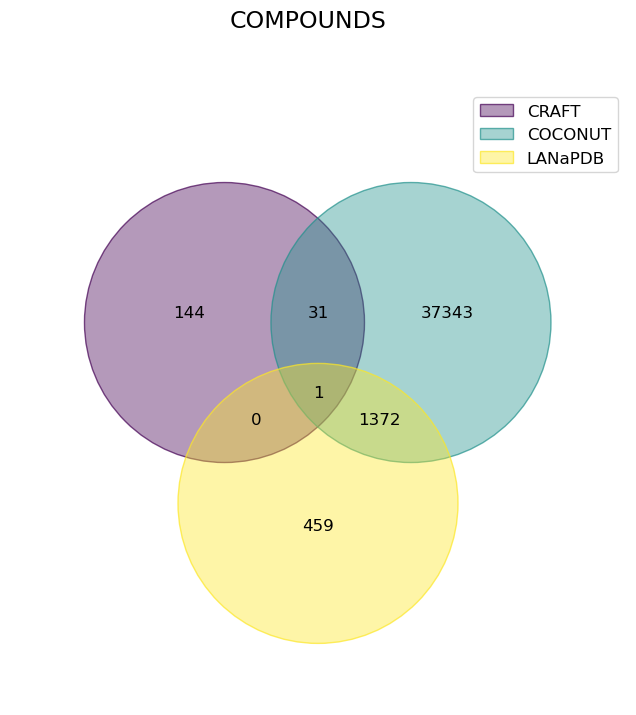

In [13]:
from venn import venn
import matplotlib.pyplot as plt
# Split dataset
Enamine = DATA[DATA["Database"]==str('Enamine')]
CRAFT = DATA[DATA["Database"]==str('CRAFT')]
Maybridge = DATA[DATA["Database"]==str('Maybridge')]
ChemDiv = DATA[DATA["Database"]==str('ChemDiv')]
coconut = DATA[DATA["Database"]==str('COCONUT')]
lanpdb = DATA[DATA["Database"]==str('LANaPDB')]

# Generate venn diagram
COMPOUNDS = {"CRAFT":set(CRAFT["SMILES_chiral"]),
             #"Life Chemicals":set(LifeChemicals["SMILES_chiral"]),
             #"Enamine":set(Enamine["SMILES_chiral"]),
             "COCONUT":set(coconut["SMILES_chiral"]),
             "LANaPDB":set(lanapdb["SMILES_chiral"]),
             #"ChemDiv":set(ChemDiv["SMILES_chiral"]),
             #"Maybridge":set(Maybridge["SMILES_chiral"])
            }

COMPOUNDS = venn(COMPOUNDS, fontsize=12)
plt.suptitle("COMPOUNDS", fontsize=17)

In [14]:
# Generate new labels of overlapping compounds
FinalSet = []
for name, group in DATA.groupby(DATA["SMILES_chiral"]):
    label = list(group["Database"])
    label.sort()
    FinalSet.append([name, "-".join(label)])

DATA = pd.DataFrame(FinalSet, columns=["SMILES_chiral", "Database"])
print(DATA.shape)
DATA.head()

(79224, 2)


,SMILES_chiral,Database
0,Br,COCONUT
1,Br/C=C\CBr,COCONUT
2,BrC1=CC2C=CC(C1)C2,Maybridge
3,BrC1=NOC2CNCC12,ChemDiv
4,BrC1CCCOC1,ChemDiv


In [15]:
# Show initial labels
set(list(DATA["Database"]))

{'COCONUT',
 'COCONUT-CRAFT',
 'COCONUT-CRAFT-ChemDiv',
 'COCONUT-CRAFT-ChemDiv-Enamine',
 'COCONUT-CRAFT-ChemDiv-Enamine-Life Chemicals-Maybridge',
 'COCONUT-CRAFT-ChemDiv-Enamine-Maybridge',
 'COCONUT-CRAFT-ChemDiv-LANaPDB',
 'COCONUT-CRAFT-ChemDiv-Life Chemicals',
 'COCONUT-CRAFT-ChemDiv-Life Chemicals-Maybridge',
 'COCONUT-CRAFT-ChemDiv-Maybridge',
 'COCONUT-CRAFT-Life Chemicals',
 'COCONUT-CRAFT-Maybridge',
 'COCONUT-ChemDiv',
 'COCONUT-ChemDiv-Enamine',
 'COCONUT-ChemDiv-Enamine-LANaPDB',
 'COCONUT-ChemDiv-Enamine-LANaPDB-Life Chemicals-Maybridge',
 'COCONUT-ChemDiv-Enamine-LANaPDB-Maybridge',
 'COCONUT-ChemDiv-Enamine-Life Chemicals',
 'COCONUT-ChemDiv-Enamine-Life Chemicals-Maybridge',
 'COCONUT-ChemDiv-Enamine-Maybridge',
 'COCONUT-ChemDiv-LANaPDB',
 'COCONUT-ChemDiv-LANaPDB-Life Chemicals',
 'COCONUT-ChemDiv-LANaPDB-Life Chemicals-Maybridge',
 'COCONUT-ChemDiv-LANaPDB-Maybridge',
 'COCONUT-ChemDiv-Life Chemicals',
 'COCONUT-ChemDiv-Life Chemicals-Maybridge',
 'COCONUT-ChemDiv

In [16]:
DATA["SMILES_chiral"]

0                         Br
1                 Br/C=C\CBr
2         BrC1=CC2C=CC(C1)C2
3            BrC1=NOC2CNCC12
4                 BrC1CCCOC1
                ...         
79219        c1noc2n[nH]cc12
79220    c1oc2c3c1C[C@H]3CO2
79221        c1occ2[nH]nnc12
79222          c1onc2c1CNCC2
79223          c1scc2c1OCCO2
Name: SMILES_chiral, Length: 79224, dtype: object

In [17]:
Enamine = DATA[DATA["Database"]==str('Enamine')].reset_index(drop=True)
CRAFT = DATA[DATA["Database"]==str('CRAFT')].reset_index(drop=True)
Maybridge = DATA[DATA["Database"]==str('Maybridge')].reset_index(drop=True)
ChemDiv = DATA[DATA["Database"]==str('ChemDiv')].reset_index(drop=True)
coconut = DATA[DATA["Database"]==str('COCONUT')].reset_index(drop=True)
lanapdb = DATA[DATA["Database"]==str('LANaPDB')].reset_index(drop=True)
LifeChemicals = DATA[DATA["Database"]==str('Life Chemicals')].reset_index(drop=True)
LifeChemicals

,SMILES_chiral,Database
0,Brc1cc2c(s1)CCNC2,Life Chemicals
1,Brc1ccc(=NCC2CCCO2)[nH]c1,Life Chemicals
2,Brc1ccc(C2CNCCO2)s1,Life Chemicals
3,Brc1ccc(C2NCCS2)cc1,Life Chemicals
4,Brc1ccc(CSc2nc[nH]n2)cc1,Life Chemicals
...,...,...
12945,c1ncc(C2CNC2)cn1,Life Chemicals
12946,c1ncc(CN2CC3CCCC3C2)s1,Life Chemicals
12947,c1ncc2c(n1)CC1CCC2N1,Life Chemicals
12948,c1ncn(C2CCCC2)n1,Life Chemicals


In [18]:
DATA = pd.concat([lanapdb,coconut, CRAFT, LifeChemicals, Enamine, Maybridge, ChemDiv])
DATA = DATA.reset_index(drop=True)
DATA

,SMILES_chiral,Database
0,C#CCCC1C(C)C(=O)C(=O)C2C(C)(C)[C@H](O)CC[C@]12C,LANaPDB
1,C/C1=C/CC[C@](C)(O)/C=c2/oc(O)c(C)c2=CC1,LANaPDB
2,C/C1=C/CC[C@](C)(O)/C=c2\oc(O)c(C)c2=CC1,LANaPDB
3,C/C1=C/[C@@H]2OC(=O)[C@H](C)[C@@H]2[C@H](O)C/C...,LANaPDB
4,C/C1=C/[C@H]2OC(=O)C(C)[C@@H]2CC/C(C)=C/C[C@H]1O,LANaPDB
...,...,...
73073,c1nc2c(ccc3[nH]cnc32)[nH]1,ChemDiv
73074,c1nc2cc3c(cc2[nH]1)OCCO3,ChemDiv
73075,c1ncc(CNC2CC2)s1,ChemDiv
73076,c1nnc2n1CCCC2,ChemDiv


### 3. Generate t-MAP

In [19]:
from rdkit.Chem import AllChem, MACCSkeys
from rdkit import Chem
import tmap as tm
#######################################################################################################
#MACCS keys
fps = [[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in DATA["SMILES_chiral"]]
fps = [np.array(x) for x in fps]
##############################################################################################################
# Generate t-MAP
fps = [tm.VectorUchar(x) for x in fps]
enc = tm.Minhash(1024)
lf=tm.LSHForest(1024, 64, store=True) 
lf.batch_add(enc.batch_from_binary_array(fps))
lf.index()
cfg = tm.LayoutConfiguration()
cfg.node_size = 1/40 
cfg.k = 20 
cfg.kc = 10 
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)

# Define coordinates
DATA["x"] = x
DATA["y"] = y

In [20]:
DATA.head()

,SMILES_chiral,Database,x,y
0,C#CCCC1C(C)C(=O)C(=O)C2C(C)(C)[C@H](O)CC[C@]12C,LANaPDB,-0.345170,0.054936
1,C/C1=C/CC[C@](C)(O)/C=c2/oc(O)c(C)c2=CC1,LANaPDB,-0.322860,-0.126318
2,C/C1=C/CC[C@](C)(O)/C=c2\oc(O)c(C)c2=CC1,LANaPDB,-0.324361,-0.125820
3,C/C1=C/[C@@H]2OC(=O)[C@H](C)[C@@H]2[C@H](O)C/C...,LANaPDB,-0.321728,-0.051181
4,C/C1=C/[C@H]2OC(=O)C(C)[C@@H]2CC/C(C)=C/C[C@H]1O,LANaPDB,-0.329503,-0.050268


In [21]:
# Print new labels
color_list = list(set(list(DATA["Database"])))
print(color_list)
#lanapdb,coconut, CRAFT, LifeChemicals, Enamine, Maybridge, ChemDiv

['Life Chemicals', 'Enamine', 'CRAFT', 'Maybridge', 'ChemDiv', 'COCONUT', 'LANaPDB']


In [22]:
# Define color function according new labels
def color(label):
    if label == 'ChemDiv':
        return int(1)
    elif label == 'Maybridge':
        return int(2)
    elif label == 'Life Chemicals':
        return int(3)
    elif label == 'Enamine':
        return int(4)
    elif label == 'LANaPDB':
        return int(5)
    elif label == 'CRAFT':
        return int(6)
    elif label == 'COCONUT':
        return int(7)

In [23]:
DATA["COLOR"] = [color(x) for x in DATA["Database"]]

In [24]:
DATA.head(2)

,SMILES_chiral,Database,x,y,COLOR
0,C#CCCC1C(C)C(=O)C(=O)C2C(C)(C)[C@H](O)CC[C@]12C,LANaPDB,-0.34517,0.054936,5
1,C/C1=C/CC[C@](C)(O)/C=c2/oc(O)c(C)c2=CC1,LANaPDB,-0.32286,-0.126318,5


### 4. Plot t-MAP

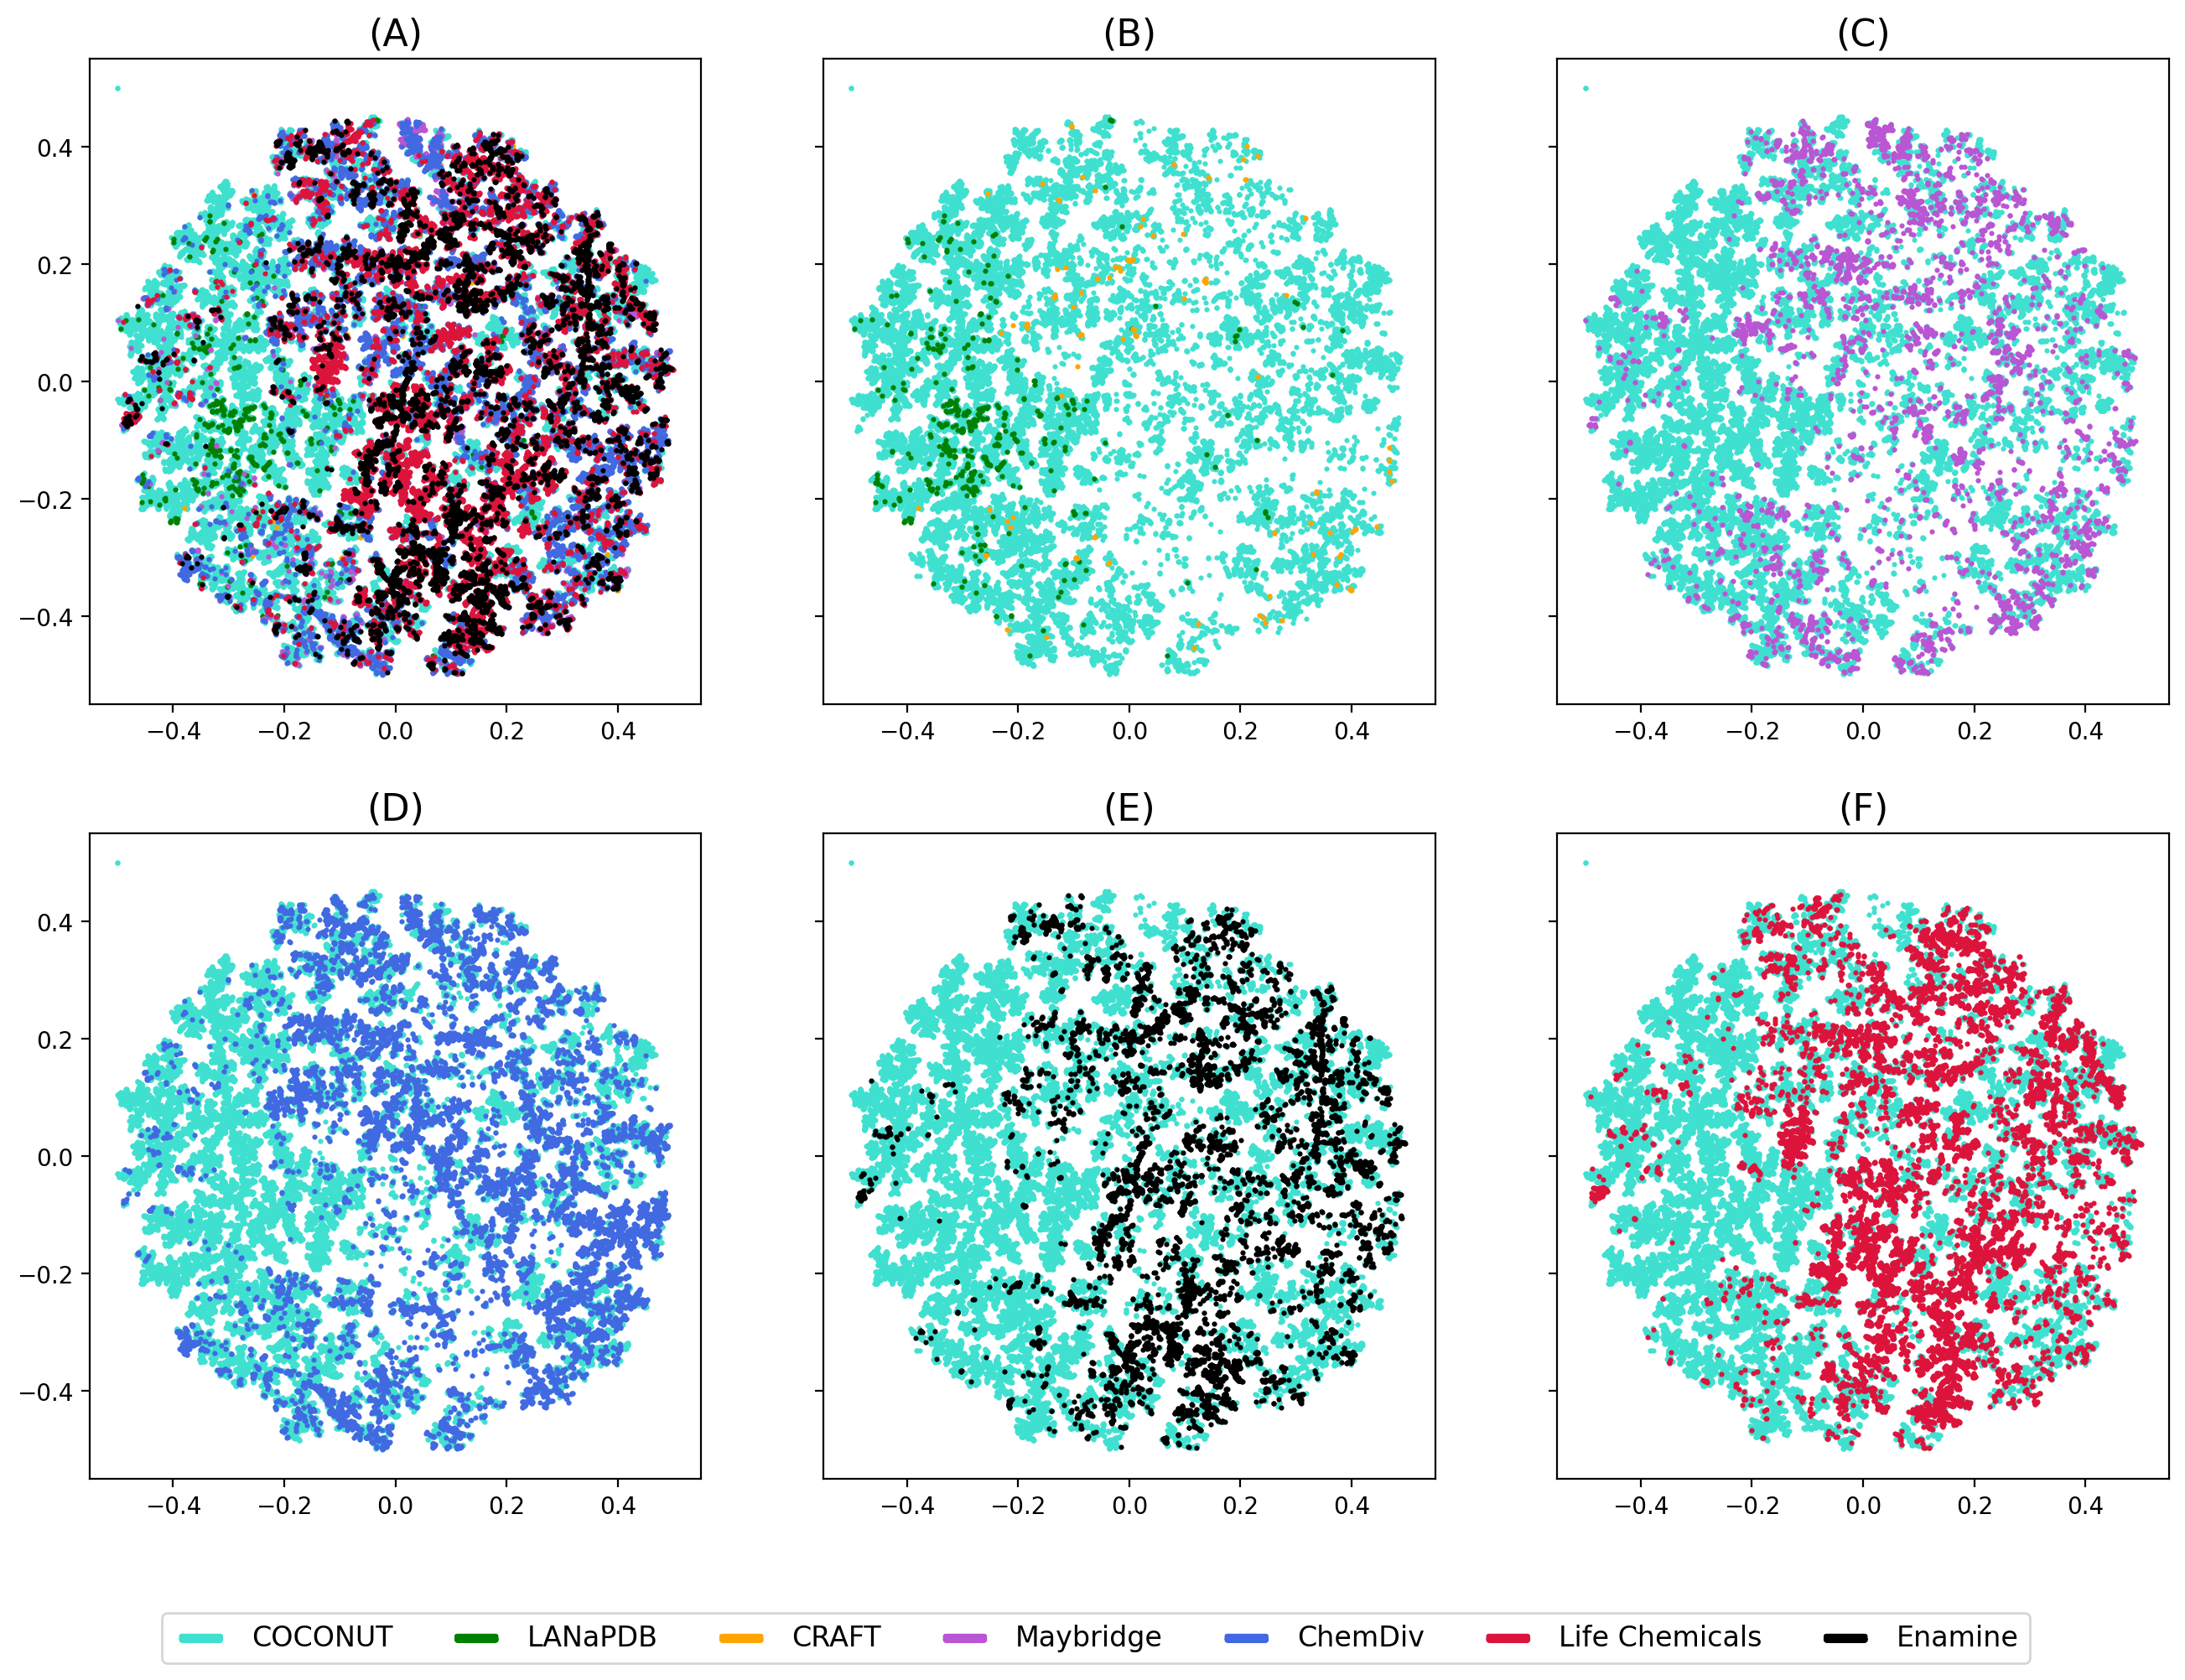

In [25]:
FinalSet = DATA.copy()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots (2,3, figsize=(16,11), dpi=200, sharey=True)

A=ax1.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
B=ax1.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["x"], FinalSet[FinalSet["Database"] == "LANaPDB"]["y"], s=1.5, c="green")
C=ax1.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["x"], FinalSet[FinalSet["Database"] == "CRAFT"]["y"], s=1.5, c="orange")
D=ax1.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["x"], FinalSet[FinalSet["Database"] == "Maybridge"]["y"], s=1.5, c="mediumorchid")
E=ax1.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["x"], FinalSet[FinalSet["Database"] == "ChemDiv"]["y"], s=1.5, c="royalblue")
F=ax1.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["x"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["y"], s=1.5, c="crimson")
G=ax1.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["x"], FinalSet[FinalSet["Database"] == "Enamine"]["y"], s=1.5, c="black")

ax2.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
ax2.scatter(FinalSet[FinalSet["Database"] == "LANaPDB"]["x"], FinalSet[FinalSet["Database"] == "LANaPDB"]["y"], s=1.5, c="green")
ax2.scatter(FinalSet[FinalSet["Database"] == "CRAFT"]["x"], FinalSet[FinalSet["Database"] == "CRAFT"]["y"], s=1.5, c="orange")

ax3.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
ax3.scatter(FinalSet[FinalSet["Database"] == "Maybridge"]["x"], FinalSet[FinalSet["Database"] == "Maybridge"]["y"], s=1.5, c="mediumorchid")

ax4.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
ax4.scatter(FinalSet[FinalSet["Database"] == "ChemDiv"]["x"], FinalSet[FinalSet["Database"] == "ChemDiv"]["y"], s=1.5, c="royalblue")

ax5.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
ax5.scatter(FinalSet[FinalSet["Database"] == "Enamine"]["x"], FinalSet[FinalSet["Database"] == "Enamine"]["y"], s=1.5, c="black")

ax6.scatter(FinalSet[FinalSet["Database"] == "COCONUT"]["x"], FinalSet[FinalSet["Database"] == "COCONUT"]["y"], s=1.5, c="turquoise")
ax6.scatter(FinalSet[FinalSet["Database"] == "Life Chemicals"]["x"], FinalSet[FinalSet["Database"] == "Life Chemicals"]["y"], s=1.5, c="crimson")

ax1.set_title("(A)", fontsize=16)
ax2.set_title("(B)", fontsize=16)
ax3.set_title("(C)", fontsize=16)
ax4.set_title("(D)", fontsize=16)
ax5.set_title("(E)", fontsize=16)
ax6.set_title("(F)", fontsize=16)

ax1.set_xlim(-0.55,0.55)
ax2.set_xlim(-0.55,0.55)
ax3.set_xlim(-0.55,0.55)
ax4.set_xlim(-0.55,0.55)
ax5.set_xlim(-0.55,0.55)
ax6.set_xlim(-0.55,0.55)

ax1.set_ylim(-0.55,0.55)
plt.rc('xtick',labelsize=12) 
plt.rc('ytick',labelsize=12) 

fig.legend((A,B, C, D, E, F, G ),("COCONUT", "LANaPDB", "CRAFT", "Maybridge", 'ChemDiv',"Life Chemicals", "Enamine"),  
           loc="lower center", bbox_to_anchor=(0.5, 0.01), borderaxespad=0,
           scatterpoints=400,
           ncol=7, 
           fontsize=12)

plt.show()
fig.savefig("TMAP_Fragments_RO3_MACCSkeys.jpg", bbox_inches='tight', pad_inches=0)

In [26]:
from faerun import Faerun
from matplotlib.colors import ListedColormap
# Relate index and new labels
legend_labels = [
(1,'ChemDiv'),
(2,'Maybridge'),
(3,'Life Chemicals'),
(4,'Enamine'),
(5,'LANaPDB'),
(6,'CRAFT'),
(7,'COCONUT')
         ]
color = ["blue", #ChemDiv
         "purple", #Maybridge
         "red", #Life Chemicals
         "white", #Enamine
         "green", #LANaPDB
         "orange", #CRAFT
         "cyan", #COCONUT
        ]
# Define color palette
custom_cmap = ListedColormap(color)

# Generate scatter plot
faerun = Faerun(view="front", coords=False)
faerun.add_scatter(
    "ESOL_Basic",
    {   "x": x, 
        "y": y,
        "c": list(DATA.COLOR.values),
        "labels": DATA["SMILES_chiral"]
    },
    point_scale=2,
    colormap=[custom_cmap],
    has_legend=True,
    legend_labels=legend_labels,
    legend_title = 'Data set',
)
# Plot t-MAP and save file.html
faerun.plot('TMAP_Fragments_RO3_MACCSkeys', template="smiles", notebook_height=1000)

/Users/anachavez/Documents/Colaboraciones/COCONUT_2024/TMAP_Chemical space/TMAP_Fragments_RO3_MACCSkeys.html